# Problem Definition

- The objective of this project is to analyze the dataset's results of insurance price charged to the costomer and perform machine learning algorithms for predicting the price charged to the customers based on various features to buy an insurance.

## Business Case: :-  Create a machine learning model to predict the insurance price charged to the customer.

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
data=pd.read_csv('insurance.csv')

In [85]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Domain Analysis

In [8]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## Basic checks

In [9]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
data.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


# Exploratory Data Analysis

# Univariate Analysis

In [14]:
import sweetviz as sv
report=sv.analyze(data)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Insights:

Age:  
  - The dataset shows that the person can buy insurance at the minimum age of 18 years.
  - The dataset shows that the person can buy insurance untill the maximum age of 64 years.
  - Around 10% people are buying it at an age between 18 to 19  years.
  - Maximum people buy insurance between age of 20 to 30 years.
  - The avg age of buyers is 39 years.
Sex:  
   - 51% of the male and 49% of the female buys insurance.

BMI:
   - BMI data is normally distributed.
   - Maximum insurance buyer have BMI between 25 to 35.
   - Average BMI is 30.5.
   
Children:
   - People who dont have any child buys the insurance. They are 43% of the total population.
   - There are only 1% of the people having 5 children. 
    
Smoke:
   - 80% of the people who dont smoke buys the insurance.

region:
   - About 27% of the people living in the south east areas buys the insurance.

Charges:
   - Maximum charges for the insurance is 63770 units.
   - Maximum buyers pay between 0.0k to 20.0k.
   - Minimum charges for the insurance is 1122 units.
   - Average charges for the insurance is 13,270 units.

In [12]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Bivariate Analysis

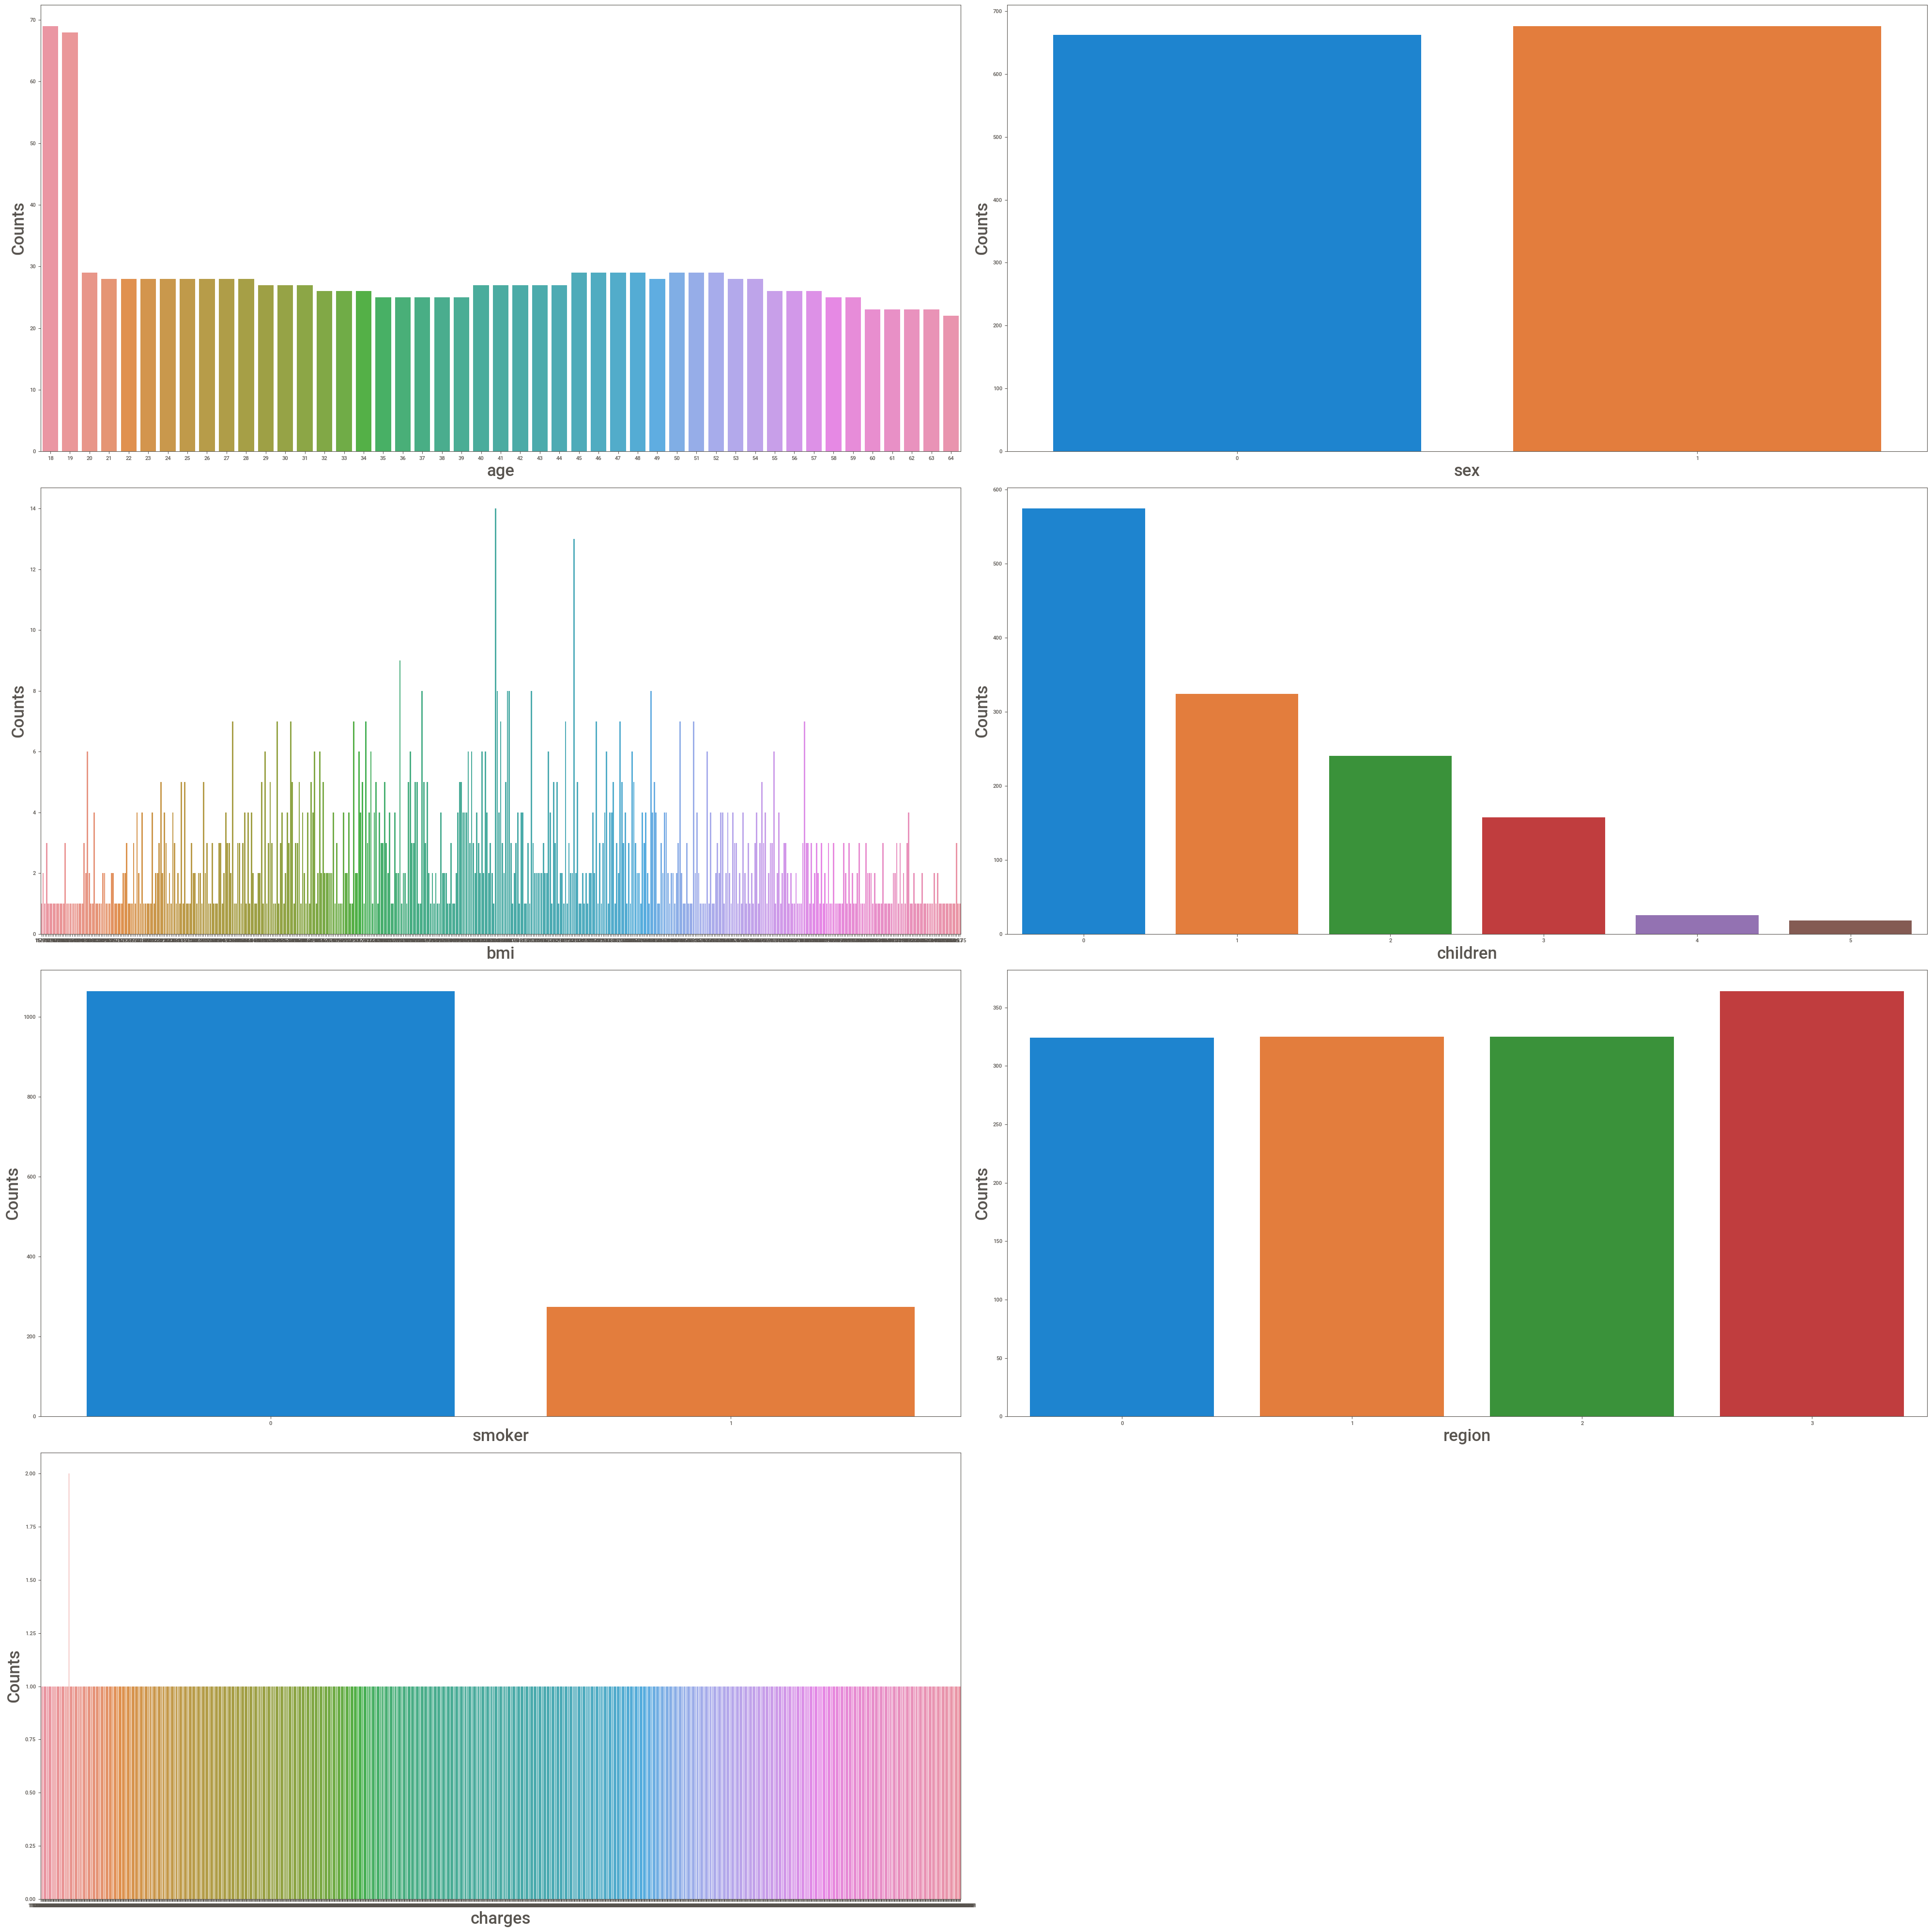

In [81]:
plt.figure(figsize=(40,40),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.countplot(x=data[column])
        plt.xlabel(column,fontsize=25)
        plt.ylabel('Counts',fontsize=25)
    plotnumber+=1
plt.tight_layout()

# Insights

Age:  
  - The dataset shows that the person can buy insurance maximum at the minimum age of 18 years.
  - Around 10% people are buying it at an age between 18 to 19  years.
  
Sex:  
   - 51% of the male and 49% of the female buys insurance.

BMI:
   - BMI data is normally distributed.
   
Children:
   - People who dont have any child buys the insurance. They are 43% of the total population.
   - There are only 1% of the people having 5 children. 
    
Smoke:
   - 80% of the people who dont smoke buys the insurance.

region:
   - About 27% of the people living in the south east areas buys the insurance.



## Data Preprocessing

In [88]:
## Checking the missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

C:\Users\asati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


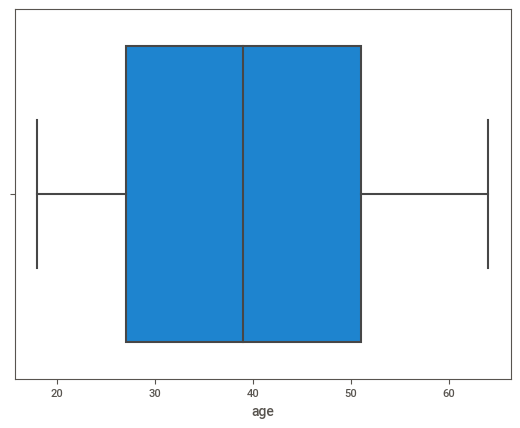

In [28]:

sns.boxplot(data['age'])
plt.show()

There is no outliers in the age column

C:\Users\asati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


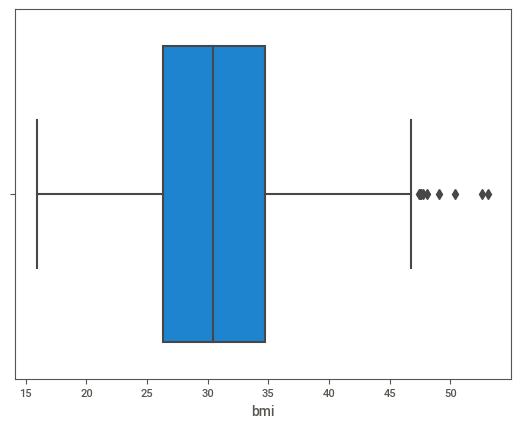

In [29]:

sns.boxplot(data['bmi'])
plt.show()

## Handling outliers in the bmi columns

In [86]:
from scipy import stats

In [87]:
IQR=stats.iqr(data.bmi,interpolation='midpoint')
IQR

8.384999999999998

In [88]:
Q1=data.bmi.quantile(0.25)
Q3=data.bmi.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
print(min_limit,max_limit)

13.718750000000004 47.271249999999995


In [89]:
len(data.loc[data['bmi']<min_limit])

0

In [90]:
len(data.loc[data['bmi']>max_limit])

9

In [91]:
data.shape

(1338, 7)

In [92]:
## Calculating the percentage of the outliers

9/1338*100

0.672645739910314

In [93]:
## imputing the outliers with median

data.loc[data['bmi']>max_limit,'bmi']=np.median(data.bmi)

C:\Users\asati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


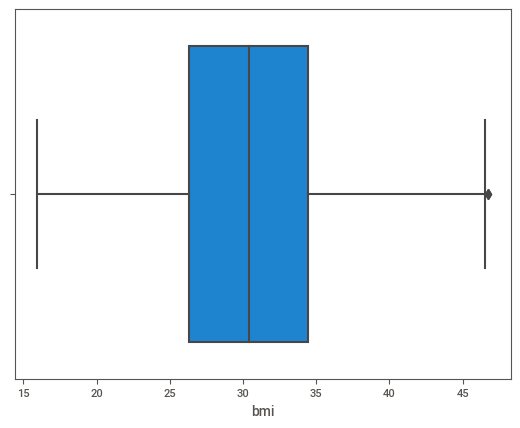

In [97]:
sns.boxplot(data['bmi'])
plt.show()

## Checking outliers in children column

C:\Users\asati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


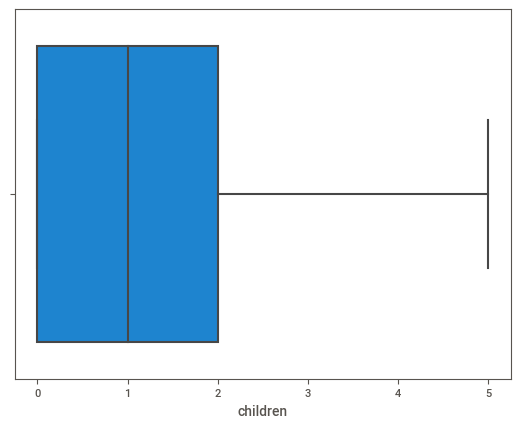

In [39]:
sns.boxplot(data['children'])
plt.show()

## Conversion of categorical to numerical values

In [24]:
data.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [94]:
data['sex']=data['sex'].map({'male':1,'female':0})
data['smoker']=data['smoker'].map({'yes':1,'no':0})

In [95]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [96]:
data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [97]:
region={'northeast':0,'northwest':1,'southwest':2,'southeast':3}
data['region']=data['region'].map(lambda x:region[x])

In [98]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [99]:
data.to_csv('preprocessing.csv')

In [100]:
df=pd.read_csv('preprocessing.csv')


In [101]:
df.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,0,27.900,0,1,2,16884.92400
1,1,18,1,33.770,1,0,3,1725.55230
2,2,28,1,33.000,3,0,3,4449.46200
3,3,33,1,22.705,0,0,1,21984.47061
4,4,32,1,28.880,0,0,1,3866.85520


# Feature Selection

In [33]:
df.describe()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,0.505232,30.536424,1.094918,0.204783,1.544843,13270.422265
std,386.391641,14.049960,0.500160,5.899998,1.205493,0.403694,1.130197,12110.011237
min,0.000000,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,334.250000,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,668.500000,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,1002.750000,51.000000,1.000000,34.430000,2.000000,0.000000,3.000000,16639.912515
max,1337.000000,64.000000,1.000000,46.750000,5.000000,1.000000,3.000000,63770.428010


In [102]:
# Dropping the unwanted variables
l1=['Unnamed: 0']
df.drop(l1,axis=1,inplace=True)

In [103]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Checking the correlation within the independent variables

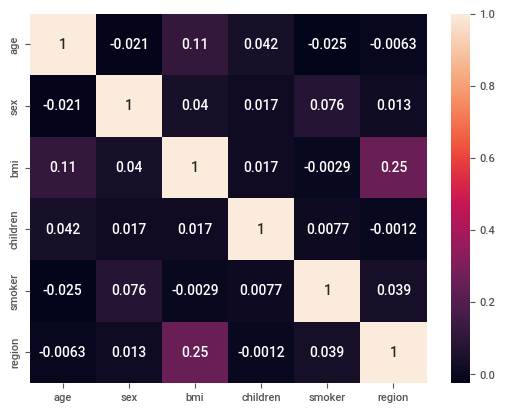

In [104]:
sns.heatmap(data.drop('charges',axis=1).corr(),annot=True)
plt.show()

In [ ]:
No  correlation is there.

# Scaling the Data

In [105]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
d1=['charges']
df1=sc.fit_transform(df.drop(d1,axis=1))


In [106]:
df1

array([[-1.43876426, -1.0105187 , -0.44701868, -0.90861367,  1.97058663,
         0.40287427],
       [-1.50996545,  0.98959079,  0.54826883, -0.07876719, -0.5074631 ,
         1.28800691],
       [-0.79795355,  0.98959079,  0.41771153,  1.58092576, -0.5074631 ,
         1.28800691],
       ...,
       [-1.50996545, -1.0105187 ,  1.07049806, -0.90861367, -0.5074631 ,
         1.28800691],
       [-1.29636188, -1.0105187 , -0.80308406, -0.90861367, -0.5074631 ,
         0.40287427],
       [ 1.55168573, -1.0105187 , -0.2486394 , -0.90861367,  1.97058663,
        -0.48225837]])

In [107]:
con_df=df[['charges']]

In [108]:
df2=pd.DataFrame(df1,columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])

In [109]:
final_df=pd.concat([df2,con_df],axis=1)

In [110]:
final_df

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,-1.010519,-0.447019,-0.908614,1.970587,0.402874,16884.92400
1,-1.509965,0.989591,0.548269,-0.078767,-0.507463,1.288007,1725.55230
2,-0.797954,0.989591,0.417712,1.580926,-0.507463,1.288007,4449.46200
3,-0.441948,0.989591,-1.327857,-0.908614,-0.507463,-0.482258,21984.47061
4,-0.513149,0.989591,-0.280855,-0.908614,-0.507463,-0.482258,3866.85520
...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.073515,1.580926,-0.507463,-0.482258,10600.54830
1334,-1.509965,-1.010519,0.234592,-0.908614,-0.507463,-1.367391,2205.98080
1335,-1.509965,-1.010519,1.070498,-0.908614,-0.507463,1.288007,1629.83350
1336,-1.296362,-1.010519,-0.803084,-0.908614,-0.507463,0.402874,2007.94500


In [111]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Model Creation 

In [112]:

### Split X and Y
X = final_df.drop(columns = ['charges']) # Independent variables
y = final_df['charges'] # Dependent or target varaible.

In [113]:
X

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.447019,-0.908614,1.970587,0.402874
1,-1.509965,0.989591,0.548269,-0.078767,-0.507463,1.288007
2,-0.797954,0.989591,0.417712,1.580926,-0.507463,1.288007
3,-0.441948,0.989591,-1.327857,-0.908614,-0.507463,-0.482258
4,-0.513149,0.989591,-0.280855,-0.908614,-0.507463,-0.482258
...,...,...,...,...,...,...
1333,0.768473,0.989591,0.073515,1.580926,-0.507463,-0.482258
1334,-1.509965,-1.010519,0.234592,-0.908614,-0.507463,-1.367391
1335,-1.509965,-1.010519,1.070498,-0.908614,-0.507463,1.288007
1336,-1.296362,-1.010519,-0.803084,-0.908614,-0.507463,0.402874


In [114]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [115]:
# Step2 Training and testing data creation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [116]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

# Linear Regression

In [117]:
# Step 3 Creating model
from sklearn.linear_model import LinearRegression
LR=LinearRegression()  ## object creation
LR.fit(X_train,y_train)
# training of linear regression
y_predict=LR.predict(X_test)

In [118]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

In [59]:
y_predict

array([ 8748.12287968,  7111.50519163, 36805.30222337,  9429.45676521,
       27124.26019463, 11397.87352861,   101.90598698, 17097.65442164,
         770.1786047 , 11241.96838908, 28290.89247897,  9455.63221029,
        5138.85286221, 38530.40118285, 40350.15308353, 37158.25085992,
       15315.21081682, 35890.63476548,  8936.27873017, 31438.77705705,
        4017.20638711, 10456.64564167,  2708.78782801,  7232.69362437,
       11264.52900069, 12879.93681917, 14824.84933907,  6196.60826777,
        9765.28430725,  2137.00406363,  9320.89402209, 13119.04449534,
        4552.86448641,  3252.12024045,  4772.27391849, 13140.87911433,
        2185.49019258,  9050.52787766, 33177.02377767, 32602.32100725,
        4122.47347832,  4453.40800549, 14467.94417236, 11400.28654502,
        8795.92429787, 12317.5536789 ,  5393.69593038,  3295.30196718,
       35498.00946926,  9222.37642626, 15793.75427415,  2280.24941215,
       12598.90816565,  1382.84863363, 13371.37749182, 12519.2734467 ,
      

In [119]:
# Step4 Model Evalution
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_predict)

In [120]:
r2score

0.7721002640891022

In [121]:
adjusted_r2 = 1-(1-0.77)*(268-6)/(268-6-1)

In [122]:
adjusted_r2

0.7691187739463602

In [123]:
import math
print(mean_squared_error(y_test,y_predict))
print(math.sqrt(mean_squared_error(y_test,y_predict)))
# root mean squared error

35381144.90747706
5948.205183706851


In [124]:
X_test.shape

(268, 6)

In [125]:
LR.intercept_

13307.64219307494

In [126]:
LR.coef_

array([3589.10878624,   15.28050784, 2094.49798267,  502.13789535,
       9544.51001478, -252.95700452])

# KNN Model creation

In [127]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

rmse_val = [] #create list to store rmse values for different k
for K in range(1,20):
    
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 7193.234602678469
RMSE value for k=  2 is: 6046.493512238088
RMSE value for k=  3 is: 5554.183560910836
RMSE value for k=  4 is: 5481.943487722548
RMSE value for k=  5 is: 5262.82522239489
RMSE value for k=  6 is: 5122.203915046251
RMSE value for k=  7 is: 5064.427253975845
RMSE value for k=  8 is: 5154.827210121837
RMSE value for k=  9 is: 5202.312538621616
RMSE value for k=  10 is: 5271.079312219658
RMSE value for k=  11 is: 5283.323928437942
RMSE value for k=  12 is: 5268.692348344818
RMSE value for k=  13 is: 5249.467889771057
RMSE value for k=  14 is: 5257.490215701361
RMSE value for k=  15 is: 5252.574952765085
RMSE value for k=  16 is: 5270.005328327855
RMSE value for k=  17 is: 5281.025417742553
RMSE value for k=  18 is: 5335.461441848708
RMSE value for k=  19 is: 5383.621813064493


In [128]:
# let's fit the data into KNN model and see how well it performs:
knn1 =KNeighborsRegressor(n_neighbors=8)
knn1.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=8)

In [129]:
# predict
y_pred=knn1.predict(X_test)

In [130]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_predict)

In [131]:
r2score

0.7721002640891022

In [132]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.77)*(268-6)/(268-6-1)
adjusted_r2

0.7691187739463602

In [133]:
X_test.shape

(268, 6)

In [134]:
import math
print(mean_squared_error(y_test,y_predict))
print(math.sqrt(mean_squared_error(y_test,y_predict)))
# root mean squared error

35381144.90747706
5948.205183706851


In [135]:
LR.intercept_

13307.64219307494

In [136]:
LR.coef_

array([3589.10878624,   15.28050784, 2094.49798267,  502.13789535,
       9544.51001478, -252.95700452])

# Decision Tree

In [139]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor() 
dt.fit(X_train,y_train)
y_hat=dt.predict(X_test)
y_hat 

array([ 8606.2174  ,  4571.41305 , 28950.4692  ,  9500.57305 ,
       33732.6867  , 11326.71487 ,  2585.85065 , 14410.9321  ,
        2775.19215 , 10407.08585 , 19361.9988  ,  6710.1919  ,
        4350.5144  , 46200.9851  , 48173.361   , 48885.13561 ,
        8347.1643  , 41676.0811  ,  8703.456   , 21348.706   ,
        5615.369   ,  8522.003   ,  1253.936   ,  2741.948   ,
       10493.9458  , 10435.06525 , 13228.84695 ,  4618.0799  ,
        9447.25035 ,  1163.4627  ,  8162.71625 , 11840.77505 ,
       11482.63485 ,  5325.651   ,  2902.9065  ,  9704.66805 ,
        2585.269   ,  6849.026   , 24869.8368  , 37742.5757  ,
        2913.569   ,  2639.0429  , 11945.1327  , 12323.936   ,
        5124.1887  , 12913.9924  , 26018.95052 ,  5615.369   ,
       40273.6455  ,  4673.3922  , 13887.9685  ,  1720.3537  ,
        6393.60345 ,  1708.0014  , 10601.412   , 10600.5483  ,
        3857.75925 , 58571.07448 , 12231.6136  , 10072.05505 ,
       13462.52    ,  4949.7587  , 15170.069   ,  7201.

In [140]:
y_train_predict=dt.predict(X_train)
y_train_predict

array([ 9193.8385 ,  8534.6718 , 27117.99378, ..., 11931.12525,
       46113.511  , 10214.636  ])

In [141]:
## evaluating the model created
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
y_train_predict=dt.predict(X_train)

In [142]:
r2score=r2_score(y_test,y_hat)

In [143]:
r2=r2score
r2

0.7289918078846399

In [144]:
X_test.shape

(268, 6)

In [147]:
adj=1-(1-0.72)*(268-6)/(268-6-1)
adj

0.718927203065134

# Hyperparameter

In [148]:
from sklearn.model_selection import GridSearchCV

In [149]:
params = {
    "criterion":("squared_error","absolute_error"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2,4,6],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_clf = DecisionTreeRegressor(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="r2", n_jobs=-1, 
                       verbose=1, cv=3)


tree_cv.fit(X_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'absolute_error', 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2, 'splitter': 'best'})


In [155]:
Bestparamters: ({'criterion': 'absolute_error', 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2, 'splitter': 'best'})

In [157]:
tree_cv.best_score_

0.8412572843419667

In [158]:
dt1=DecisionTreeRegressor(criterion='absolute_error',max_depth=5,min_samples_leaf= 5,min_samples_split=2,splitter='best')

In [159]:
dt1.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=5,
                      min_samples_leaf=5)

In [160]:
y_hat1=dt1.predict(X_test)#predicting
y_hat1

array([ 8615.3     ,  4728.896125, 27808.7251  ,  8615.3     ,
       34779.615   ,  4728.896125,  1879.2082  , 14402.745   ,
        3066.658475, 10848.1343  , 19199.944   ,  6571.02435 ,
        4728.896125, 45863.205   , 47450.187225, 45863.205   ,
       10848.1343  , 45863.205   ,  8023.13545 , 20759.808425,
        4438.2634  ,  8615.3     ,  1879.2082  ,  1879.2082  ,
       10848.1343  , 11381.3254  , 13290.473375,  4438.2634  ,
        8615.3     ,  1879.2082  ,  7954.517   , 11381.3254  ,
        1879.2082  ,  6347.668575,  3066.658475,  8023.13545 ,
        1879.2082  ,  8023.13545 , 24520.264   , 40103.89    ,
        3462.466   ,  1879.2082  , 11381.3254  , 13290.473375,
        4728.896125, 13290.473375,  3462.466   ,  4438.2634  ,
       41347.9117  ,  4728.896125, 14402.745   ,  1879.2082  ,
        6571.02435 ,  1879.2082  , 11381.3254  , 10848.1343  ,
        4728.896125, 40103.89    , 11381.3254  ,  9549.5651  ,
       14402.745   ,  4728.896125, 13290.473375,  6571.

In [161]:
r2score=r2_score(y_test,y_hat)

In [162]:
r2=r2score
r2

0.7289918078846399

In [163]:
X_test.shape

(268, 6)

In [164]:
adj=1-(1-0.72)*(268-6)/(268-6-1)
adj

0.718927203065134

# Random Forest

In [165]:
from sklearn.ensemble import RandomForestRegressor#importing randomforest

rf_clf = RandomForestRegressor(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train,y_train)

RandomForestRegressor()

In [166]:
y_predict=rf_clf.predict(X_test)#testing

In [167]:
r2score=r2_score(y_test,y_predict)

In [168]:
r2score

0.8635424330557767

In [169]:
X_test.shape

(268, 6)

In [171]:
adj=1-(1-0.86)*(268-6)/(268-6-1)
adj

0.859463601532567

# Hyperparameter

In [173]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [5, 12, 20]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 5, 10]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestRegressor(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='r2',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)


rf_cv.fit(X_train, y_train)##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 200, 'min_samples_split': 12, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True})


In [174]:
rf_clf2 = RandomForestRegressor(n_estimators=200, min_samples_split=12, min_samples_leaf=10,max_features='auto',max_depth=10,bootstrap=True)
rf_clf2.fit(X_train, y_train)#training 
y_predict=rf_clf2.predict(X_test)#testing

In [175]:
r2score=r2_score(y_test,y_predict)

In [176]:
r2score

0.8741343190149287

In [177]:
adj=1-(1-0.87)*(268-6)/(268-6-1)
adj

0.8695019157088122

# GradientBoostingRegressor

In [178]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_predict=gbr.predict(X_test)

In [179]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

r2score=r2_score(y_test,y_predict)
r2score

0.8741448309867361

In [182]:
adj_score=1-(1-0.83)*(268-6)/(268-6-1)
adj_score

0.8293486590038314

In [183]:
import math

In [184]:
print(mean_squared_error(y_test,y_predict))
print(math.sqrt(mean_squared_error(y_test,y_predict)))

19538855.340991978
4420.277744779391


In [185]:
print (mean_absolute_error(y_test,y_predict))

2438.2865656123745


# XGBoost

In [186]:
import xgboost

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [188]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train,y_train)
y_hat=xgb.predict(X_test)
y_hat

array([12052.896  ,  7417.385  , 32305.3    ,  8384.016  , 33408.12   ,
        6985.4746 ,  -279.42026, 16378.982  ,  3851.3113 , 10596.144  ,
       20426.734  ,  7996.927  ,  4145.7905 , 45009.137  , 46826.94   ,
       42312.47   ,  9924.408  , 41106.92   , 10178.307  , 22322.922  ,
        3940.433  ,  8275.684  ,   670.388  ,  2768.786  , 12055.9375 ,
       12584.133  , 14599.803  ,  6954.3506 ,  9199.571  ,  4231.4526 ,
        7635.9536 , 12938.78   ,  2293.2761 ,  4251.221  ,  7110.027  ,
       10787.324  ,  3586.0872 ,  7178.375  , 25211.44   , 38933.73   ,
        3383.1301 ,  3500.4639 , 10051.799  , 14939.102  ,  6893.7188 ,
       12853.38   , 17776.645  ,  8109.288  , 42002.992  ,  7000.6196 ,
       13364.441  ,   944.3435 ,  4867.189  ,   843.14276, 10494.726  ,
        9457.153  ,  2237.8845 , 41899.293  , 12343.86   , 16571.08   ,
       14336.584  ,  4688.2837 , 18387.701  , 11580.262  , 10997.188  ,
        6383.101  , 16627.002  , 14365.087  ,  3620.1074 ,  2000

In [189]:
r2score1=r2_score(y_test,y_hat)
r2score1

0.8377080967624271

In [190]:
print(mean_absolute_error(y_test,y_hat))
print(mean_squared_error(y_test,y_hat))
print(math.sqrt(mean_squared_error(y_test,y_hat)))

2835.9502807252834
25195612.10901884
5019.52309577502


# Hyperparameter

In [191]:
from sklearn.model_selection import RandomizedSearchCV

paramgrid={'gamma':[0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6],
          'learning_rate':[0.1,0.01,0.001,0.0001],
          'max_depth':[3,5,6,7,9,15],
          'n_estimators':[50,65,35,85,45,100,125,150],
          'reg_alpha':[0.2,0.4,0.6,0.8,22.2,36.8,56.4],
          'reg_lambda':[0.2,0.4,0.6,0.8,22.2,36.8,56.4]}

XGB=XGBRegressor(random_state=25,verbosity=0,silent=0)

rcv=RandomizedSearchCV(estimator=XGB,param_distributions=paramgrid,n_iter=150,cv=5,verbose=2,random_state=26,n_jobs=-1)
rcv.fit(X_train,y_train)
cv_best_param=rcv.best_params_

print(f"Best Parameter:{cv_best_param}")

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best Parameter:{'reg_lambda': 0.6, 'reg_alpha': 56.4, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 25.6}


In [192]:
XGB2=XGBRegressor(reg_lambda=0.6, reg_alpha=56.4, n_estimators=50, max_depth=3, learning_rate=0.1, gamma=25.6)
XGB2.fit(X_train,y_train)
y_pred=XGB2.predict(X_test)
r2=r2_score(y_test,y_pred)

In [193]:
r2

0.8752758990748085

In [194]:
adj1=1-(1-0.87)*(268-6)/(268-6-1)
adj1

0.8695019157088122

# Conclusion

- Based on data analysis, we found that there were no any features which has strong correlation so we kept all the features

- Here we tried 6 different models as our first step in modelling process,to evaluate & choose the best model as our baseline     model.

- Based on the result, we found that XG boost with r2score after hyperparameter tuning is 0.875 or 87%.